In [30]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert job_skill column from string to clean list of skills
df['job_skills'] = df['job_skills'].apply(
    lambda x: [skill.strip().strip("[]()'\"") for skill in x.split(',')] if pd.notnull(x) else [])

In [31]:
filtered_df = df[
    (df['job_country'].str.lower() == 'united states') &
    (df['job_title_short'].str.lower() == 'data analyst')

]
filtered_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,[],None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,[],None


C:\Users\HP\AppData\Local\Temp\ipykernel_64400\44710338.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


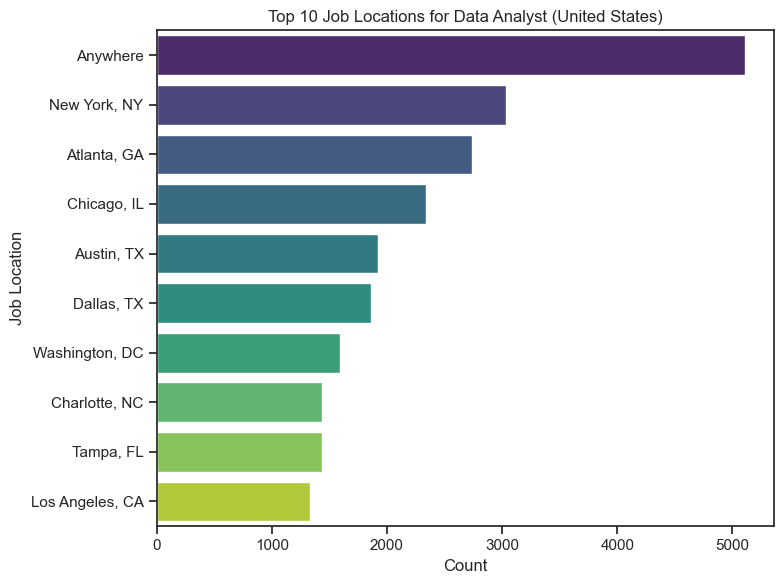

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count job_location occurrences and get top 10, largest at top
top_locations = (
    filtered_df['job_location']
    .value_counts()
    .head(10)
    .sort_values(ascending=False)  # Largest at top
)

# Create a gradient color palette (dark to light, top to bottom)
colors = sns.color_palette("viridis", n_colors=10)

plt.figure(figsize=(8, 6))
sns.set_theme(style="ticks")
sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    orient='h',
    palette=colors
)
plt.xlabel('Count')
plt.ylabel('Job Location')
plt.title('Top 10 Job Locations for Data Analyst (United States)')
plt.tight_layout()
plt.show()

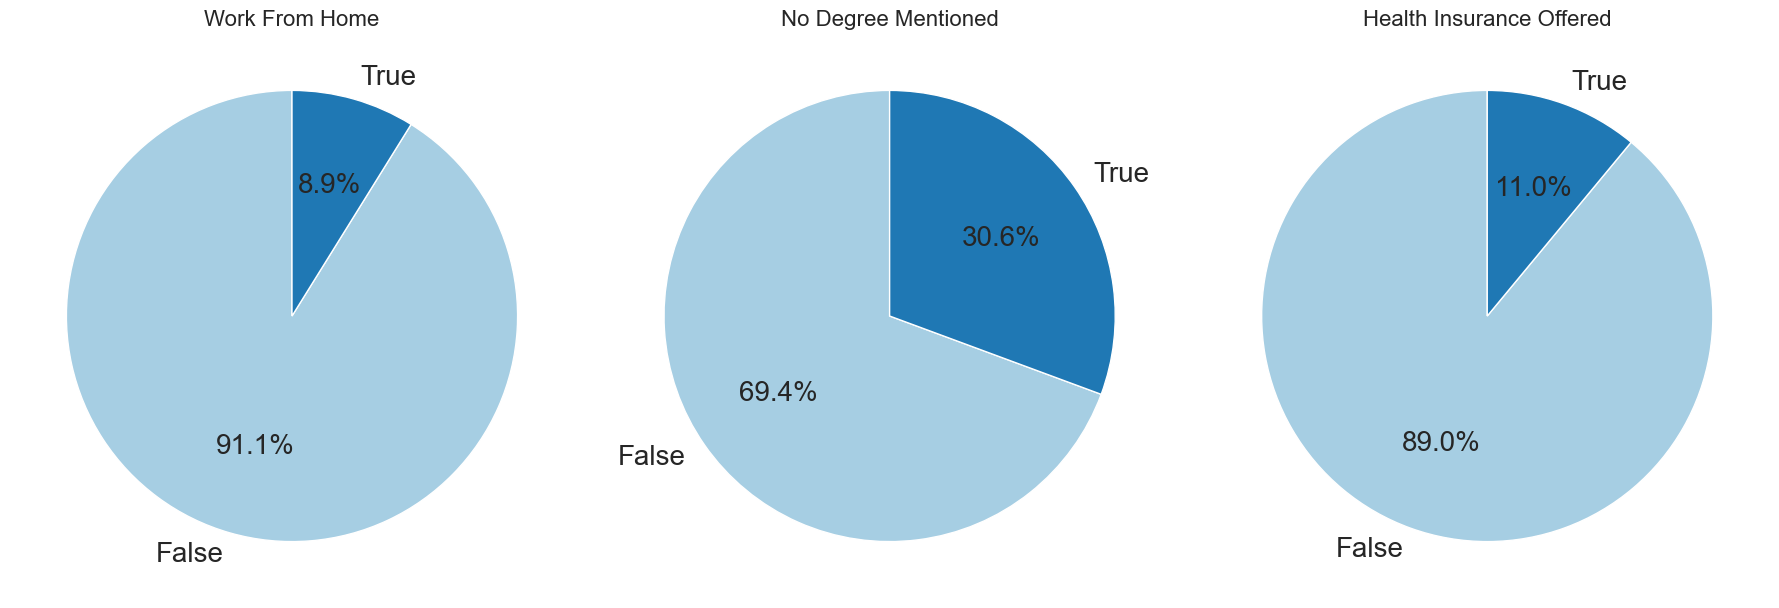

In [37]:
import matplotlib.pyplot as plt

# Prepare data for each pie chart with corrected column names
work_from_home_counts = df['job_work_from_home'].value_counts(dropna=False)
degree_counts = df['job_no_degree_mention'].value_counts(dropna=False)
health_insurance_counts = df['job_health_insurance'].value_counts(dropna=False)

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for job_work_from_home
axs[0].pie(
    work_from_home_counts.values,
    labels=work_from_home_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 20}
)
axs[0].set_title('Work From Home', fontsize=16)

# Pie chart for job_no_degree_mention
axs[1].pie(
    degree_counts.values,
    labels=degree_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 20}
)
axs[1].set_title('No Degree Mentioned', fontsize=16)

# Pie chart for job_health_insurance
axs[2].pie(
    health_insurance_counts.values,
    labels=health_insurance_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 20}
)
axs[2].set_title('Health Insurance Offered', fontsize=16)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_64400\2530158613.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


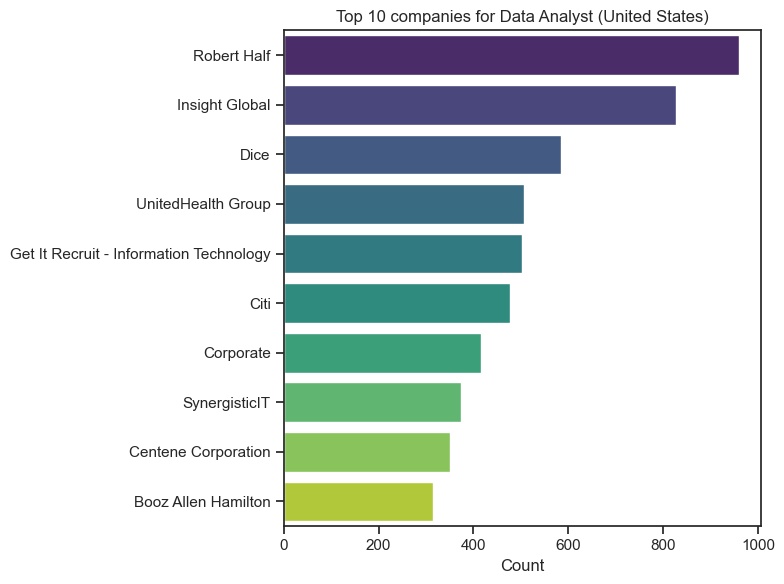

In [41]:
# Count company_named get top 10, largest at top
top_companies = (
    filtered_df['company_name']
    .value_counts()
    .head(10)
    .sort_values(ascending=False)  # Largest at top
)

# Create a gradient color palette (dark to light, top to bottom)
colors = sns.color_palette("viridis", n_colors=10)

plt.figure(figsize=(8, 6))
sns.set_theme(style="ticks")
sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    orient='h',
    palette=colors
)
plt.xlabel('Count')
plt.ylabel('')
plt.title('Top 10 companies for Data Analyst (United States)')
plt.tight_layout()
plt.show()